In [1]:
# load the Advanced Optimization from AC huggingface
from gradio_client import Client
client = Client("AccelerationConsortium/crabnet-hyperparameter")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

def adv_opt(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, c1, c2, c3): 
    result = client.predict(
        x1, # float (numeric value between 0.0 and 1.0) in 'x1' Slider component
		x2,	# float (numeric value between 0.0 and 1.0)	in 'x2' Slider component
		x3,	# float (numeric value between 0.0 and 1.0) in 'x3' Slider component
		x4,	# float (numeric value between 0.0 and 1.0) in 'x4' Slider component
		x5,	# float (numeric value between 0.0 and 1.0) in 'x5' Slider component
		x6,	# float (numeric value between 0.0 and 1.0) in 'x6' Slider component
		x7,	# float (numeric value between 0.0 and 1.0) in 'x7' Slider component
		x8,	# float (numeric value between 0.0 and 1.0) in 'x8' Slider component
		x9,	# float (numeric value between 0.0 and 1.0) in 'x9' Slider component
		x10,	# float (numeric value between 0.0 and 1.0) in 'x10' Slider component
		x11,	# float (numeric value between 0.0 and 1.0) in 'x11' Slider component
		x12,	# float (numeric value between 0.0 and 1.0) in 'x12' Slider component
		x13,	# float (numeric value between 0.0 and 1.0) in 'x13' Slider component
		x14,	# float (numeric value between 0.0 and 1.0) in 'x14' Slider component
		x15,	# float (numeric value between 0.0 and 1.0) in 'x15' Slider component
		x16,	# float (numeric value between 0.0 and 1.0) in 'x16' Slider component
		x17,	# float (numeric value between 0.0 and 1.0) in 'x17' Slider component
		x18,	# float (numeric value between 0.0 and 1.0) in 'x18' Slider component
		x19,	# float (numeric value between 0.0 and 1.0) in 'x19' Slider component
		x20,	# float (numeric value between 0.0 and 1.0) in 'x20' Slider component
		c1,	# Literal['c1_0', 'c1_1'] in 'c1' Radio component
		c2,	# Literal['c2_0', 'c2_1'] in 'c2' Radio component
		c3,	# Literal['c3_0', 'c3_1', 'c3_2'] in 'c3' Radio component
		0.5,	# float (numeric value between 0.0 and 1.0) in 'fidelity1' Slider component
		api_name="/predict",
    )
    y1 = result['data'][0][0]
    y2 = result['data'][0][1]
    return y1, y2


Loaded as API: https://accelerationconsortium-crabnet-hyperparameter.hf.space ✔


In [8]:
plot = pd.read_csv('pair_plot_y1_y2.csv')
y1 = plot['y1'].to_list()
y2 = plot['y2'].to_list()
len(y1)

500

In [3]:
for i in range(100): 
    print(i)
    x1 = np.random.uniform(0, 1)
    x2 = np.random.uniform(0, 1)
    x3 = np.random.uniform(0, 1)
    x4 = np.random.uniform(0, 1)
    x5 = np.random.uniform(0, 1)
    x6 = np.random.uniform(0, 1)
    x7 = np.random.uniform(0, 1)
    x8 = np.random.uniform(0, 1)
    x9 = np.random.uniform(0, 1)
    x10 = np.random.uniform(0, 1)
    x11 = np.random.uniform(0, 1)
    x12 = np.random.uniform(0, 1)
    x13 = np.random.uniform(0, 1)
    x14 = np.random.uniform(0, 1)
    x15 = np.random.uniform(0, 1)
    x16 = np.random.uniform(0, 1)
    x17 = np.random.uniform(0, 1)
    x18 = np.random.uniform(0, 1)
    x19 = np.random.uniform(0, 1)
    x20 = np.random.uniform(0, 1)
    c1 = np.random.choice(['c1_0', 'c1_1'])
    c2 = np.random.choice(['c2_0', 'c2_1'])
    c3 = np.random.choice(['c3_0', 'c3_1', 'c3_2'])
    
    # constraints: 
    # x19 < x20
    # x6 + x15 ≤ 1.0
    # if the constraints are meet, calculate y1, 
    # if constraints not meet, select x19, x20, x6, x15 again
    while x19 >= x20 or x6 + x15 > 1.0: 
        x19 = np.random.uniform(0, 1)
        x20 = np.random.uniform(0, 1)
        x6 = np.random.uniform(0, 1)
        x15 = np.random.uniform(0, 1)

    y1_, y2_ = adv_opt(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, c1, c2, c3)

    y1.append(y1_)
    y2.append(y2_)

    # wait seconds to avoid the rate limit, 15 sec --> 30min 100 pts
    time.sleep(15)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [4]:
# make a dataframe for y1 and y2, save to csv
df = pd.DataFrame({'y1': y1, 'y2': y2})
df.to_csv('pair_plot_y1_y2.csv')

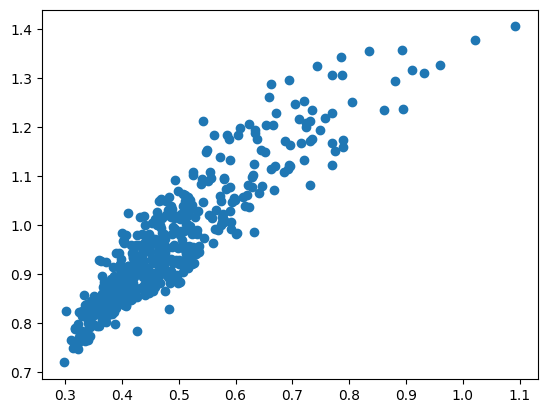

In [5]:
plot = pd.read_csv('pair_plot_y1_y2.csv')
plt.scatter(plot['y1'], plot['y2'])

add_best_fit_line Warning: trace_idx=None but figure has 12 traces, defaulting to trace_idx=0. Check fig.data[0] to make sure this is the expected trace.


<Axes: xlabel='y1', ylabel='y2'>

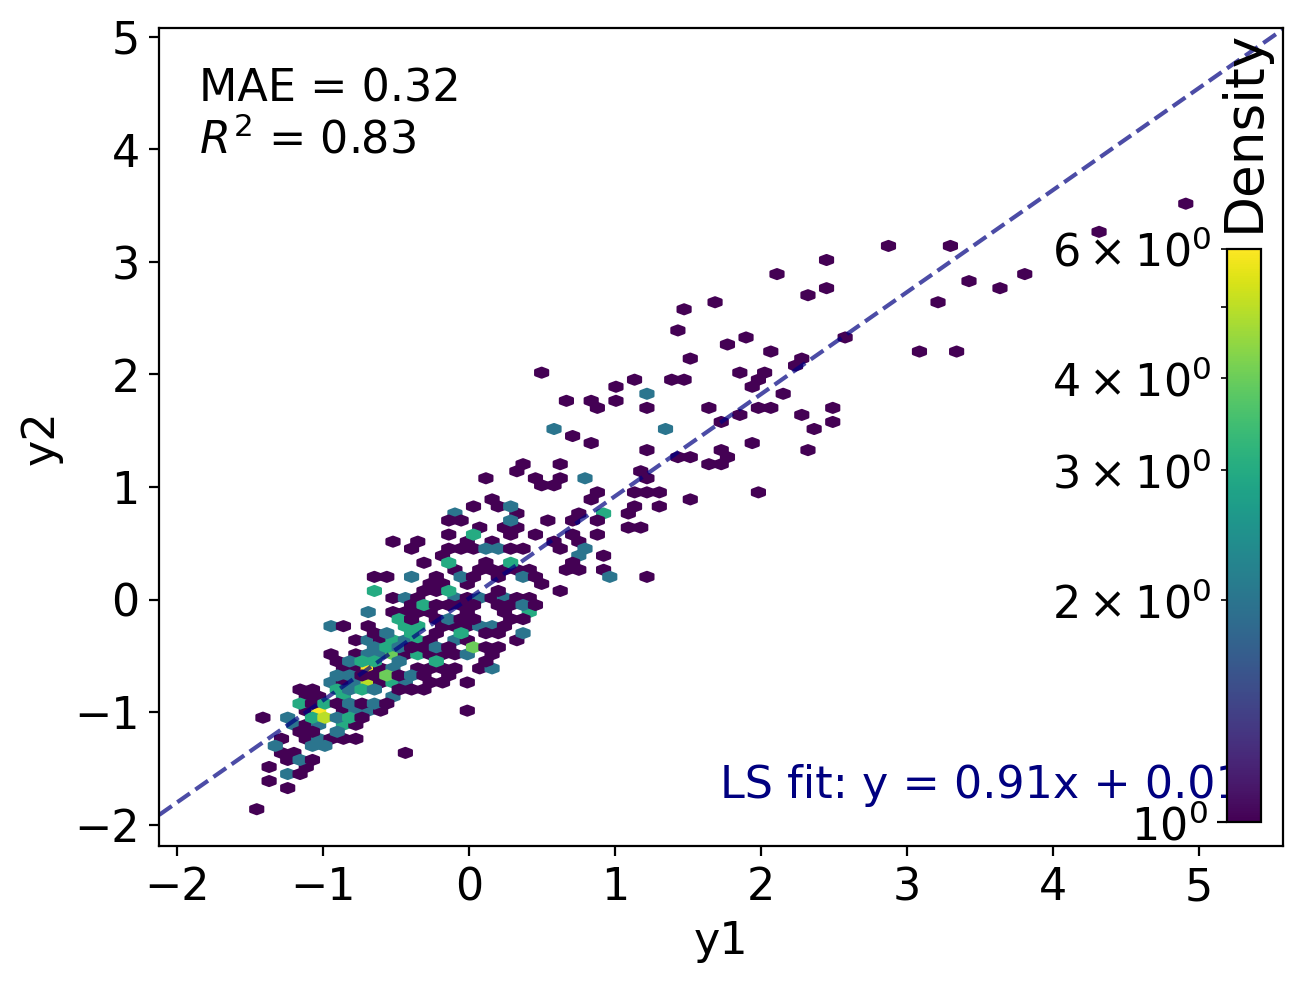

In [9]:
import pandas as pd
import pymatviz as pmv
from pymatviz import density_hexbin_with_hist, density_scatter_with_hist, density_hexbin
data = pd.read_csv('pair_plot_y1_y2.csv')
# apply standardization to the data
y1_std = (data['y1'] - data['y1'].mean()) / data['y1'].std()
y2_std = (data['y2'] - data['y2'].mean()) / data['y2'].std()

density_hexbin(y1_std, y2_std, xlabel='y1', ylabel='y2', 
               identity_line=False, best_fit_line=True)

add_best_fit_line Warning: trace_idx=None but figure has 12 traces, defaulting to trace_idx=0. Check fig.data[0] to make sure this is the expected trace.


<Axes: xlabel='y1', ylabel='y2'>

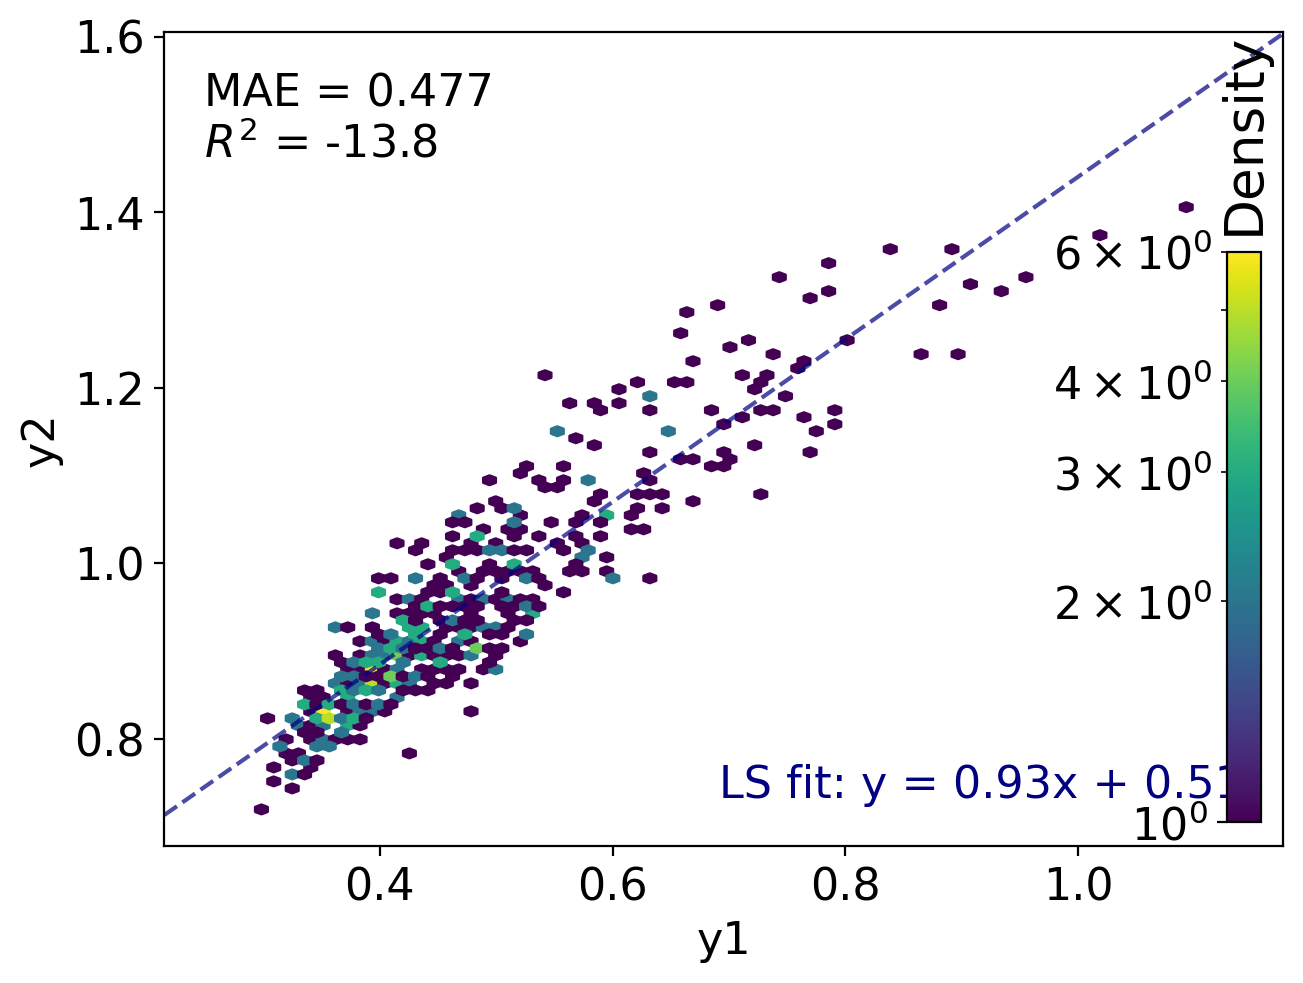

In [11]:
density_hexbin(data['y1'], data['y2'], xlabel='y1', ylabel='y2', 
               identity_line=False, best_fit_line=True)